In [1]:
import pandas
import numpy

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

%matplotlib inline  

pandas.options.mode.chained_assignment = None

def get_cpi_df():
    df = pandas.read_csv("./cpi.csv", encoding="ISO-8859-1").T
    df.columns = df.iloc[0]
    df = df[1:]

    df.replace('-', 0, inplace=True)
    df = df.astype("float")

    df[14:] = df[14:] / 10.0
    df = df * 10

    df.reset_index(inplace=True)
    df['index'] = df['index'].astype("int")
    df = df.rename(columns={'index': 'Year'})

    df.replace(0, numpy.nan, inplace=True)
    df = df.dropna(axis=1)

    aux_year = df.Year
    df = 100 - df
    df.Year = aux_year
    
    return df

get_cpi_df()

Jurisdiction,Year,Argentina,Australia,Austria,Belgium,Bolivia,Botswana,Brazil,Bulgaria,Cameroon,...,Tanzania,Thailand,Tunisia,Turkey,Uganda,Ukraine,United Kingdom,Venezuela,Zambia,Zimbabwe
0,1998,70.0,13.0,25.0,46.0,72.0,39.0,60.0,71.0,86.0,...,81.0,70.0,50.0,66.0,74.0,72.0,13.0,77.0,65.0,58.0
1,1999,70.0,13.0,24.0,47.0,75.0,39.0,59.0,67.0,85.0,...,81.0,68.0,50.0,64.0,78.0,74.0,14.0,74.0,65.0,59.0
2,2000,65.0,17.0,23.0,39.0,73.0,40.0,61.0,65.0,80.0,...,75.0,68.0,48.0,62.0,77.0,85.0,13.0,73.0,66.0,70.0
3,2001,65.0,15.0,22.0,34.0,80.0,40.0,60.0,61.0,80.0,...,78.0,68.0,47.0,64.0,81.0,79.0,17.0,72.0,74.0,71.0
4,2002,72.0,14.0,22.0,29.0,78.0,36.0,60.0,60.0,78.0,...,73.0,68.0,52.0,68.0,79.0,76.0,13.0,75.0,74.0,73.0
5,2003,75.0,12.0,20.0,24.0,77.0,43.0,61.0,61.0,82.0,...,75.0,67.0,51.0,69.0,78.0,77.0,13.0,76.0,75.0,77.0
6,2004,75.0,12.0,16.0,25.0,78.0,40.0,61.0,59.0,79.0,...,72.0,64.0,50.0,68.0,74.0,78.0,14.0,77.0,74.0,77.0
7,2005,72.0,12.0,13.0,26.0,75.0,41.0,63.0,60.0,78.0,...,71.0,62.0,51.0,65.0,75.0,74.0,14.0,77.0,74.0,74.0
8,2006,71.0,13.0,14.0,27.0,73.0,44.0,67.0,60.0,77.0,...,71.0,64.0,54.0,62.0,73.0,72.0,14.0,77.0,74.0,76.0
9,2007,71.0,14.0,19.0,29.0,71.0,46.0,65.0,59.0,76.0,...,68.0,67.0,58.0,59.0,72.0,73.0,16.0,80.0,74.0,79.0


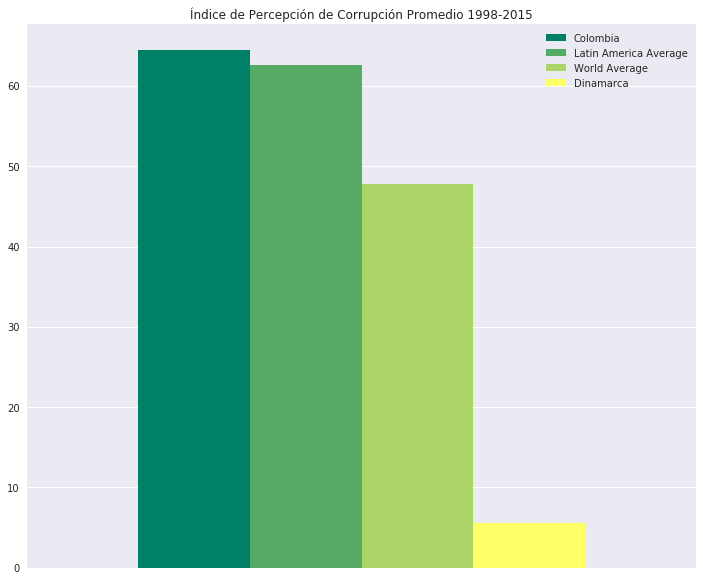

In [2]:
df_avg = get_cpi_df()
df_avg = df_avg.mean(axis=0)[1:]
df_avg["Average"] = df_avg.mean()

aml_co = [ 
    "Brazil", "Mexico", "Colombia", "Argentina", 
    "Peru", "Venezuela", "Chile", "Ecuador",  
    "Bolivia",  "El Salvador", "Costa Rica"
]

ax = pandas.DataFrame({
    'Colombia': df_avg["Colombia"],
    'Latin America Average': df_avg[aml_co].mean(),
    'World Average': df_avg.mean(),
    'Dinamarca': df_avg["Denmark"],
}, index=[0]).plot(kind='bar', 
                   figsize=(12, 10), 
                   colormap='summer', 
                   width = 1,
                   title='Índice de Percepción de Corrupción Promedio 1998-2015')

ax.get_xaxis().set_visible(False)

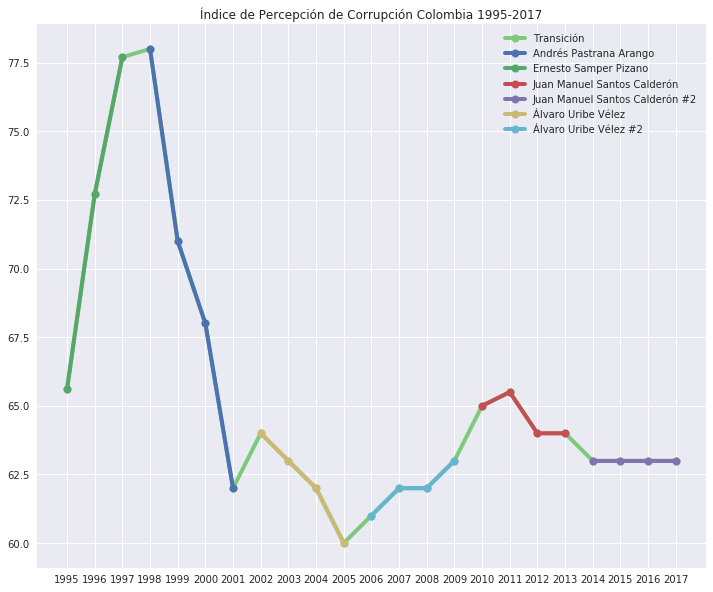

In [3]:
import random

df = get_cpi_df()
df_col = df[["Colombia", "Year"]]

df_col = df_col.append(
    pandas.DataFrame([
        {"Year": 1995, "Colombia": 65.6},
        {"Year": 1996, "Colombia": 72.7},
        {"Year": 1997, "Colombia": 77.7},
        {"Year": 2016, "Colombia": 63},
        {"Year": 2017, "Colombia": 63}
    ]),
    sort=False
)

df_col.set_index('Year')
df_col = df_col.sort_values('Year')

periods_start = list(range(df_col.Year.min() - 1, df_col.Year.max(), 4))

periods_end = list(range(df_col.Year.min() + 3, df_col.Year.max(), 4))
periods_end.append(df_col.Year.max())

presidents = [
    "Ernesto Samper Pizano",
    "Andrés Pastrana Arango",
    "Álvaro Uribe Vélez",
    "Álvaro Uribe Vélez #2",
    "Juan Manuel Santos Calderón",
    "Juan Manuel Santos Calderón #2",
]

for start, end, president in zip(periods_start, periods_end, presidents):
    df_col.loc[(df_col.Year >= start) &
               (df_col.Year <= end), "President"] = president

df_col = df_col.reset_index(drop=True)

fig, ax = plt.subplots(figsize=(8,6))
ax.set_xticks(range(len(range(df_col.Year.min(), df_col.Year.max() + 1))))
ax.set_xticklabels(range(df_col.Year.min(), df_col.Year.max() + 1))

df_col.Colombia.plot(ax=ax,
                     label="Transición", 
                     figsize=(12, 10), 
                     linewidth=4, 
                     style="-o",
                     ms=8,
                     colormap='Accent')

for label, df in df_col.groupby('President'):
    df.Colombia.plot(ax=ax,
                     label=label, 
                     figsize=(12, 10), 
                     linewidth=4, 
                     style="-o",
                     ms=8)

plt.title('Índice de Percepción de Corrupción Colombia 1995-2017')
_ = plt.legend()

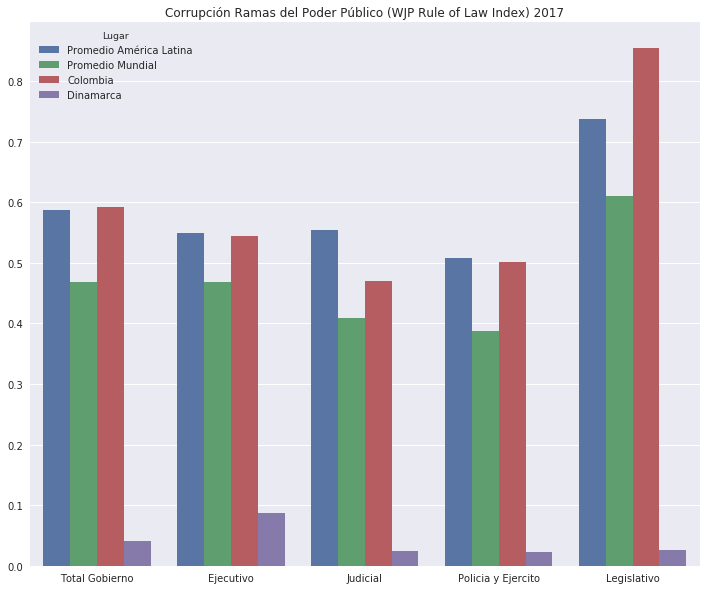

In [4]:
import seaborn as sns

data = pandas.read_excel(
    'ROL.xlsx',
    sheet_name=[
        2, 3, 4
    ]
)

aml_co = [ 
    "Brazil", "Mexico", "Colombia", "Argentina", 
    "Peru", "Venezuela", "Chile", "Ecuador",  
    "Bolivia",  "El Salvador"
]

new_data = {}
for index, (key, df) in zip(range(2015, 2018), data.items()):
    new_df = df[12:17]
    new_df.loc[:, df.columns != 'Country'] =  1.0 - new_df.loc[:, df.columns != 'Country']
    new_data[index] = df


avg_data = {}
for key, df in new_data.items():
    avg_data[key] = pandas.DataFrame([
        {'Lugar': 'Promedio América Latina' , 'Poder': 'Total Gobierno', 'Valor': df.loc[12, aml_co].mean()},
        {'Lugar': 'Promedio Mundial' , 'Poder': 'Total Gobierno', 'Valor': df.loc[12, df.columns != 'Country'].mean().mean()},
        {'Lugar': 'Colombia' , 'Poder': 'Total Gobierno', 'Valor': df.loc[12, "Colombia"]},
        {'Lugar': 'Dinamarca' , 'Poder': 'Total Gobierno', 'Valor': df.loc[12, "Denmark"]},
        {'Lugar': 'Promedio América Latina' , 'Poder': 'Ejecutivo', 'Valor': df.loc[13, aml_co].mean()},
        {'Lugar': 'Promedio Mundial' , 'Poder': 'Ejecutivo', 'Valor': df.loc[13, df.columns != 'Country'].mean().mean()},
        {'Lugar': 'Colombia' , 'Poder': 'Ejecutivo', 'Valor': df.loc[13, "Colombia"]},
        {'Lugar': 'Dinamarca' , 'Poder': 'Ejecutivo', 'Valor': df.loc[13, "Denmark"]},
        {'Lugar': 'Promedio América Latina' , 'Poder': 'Judicial', 'Valor': df.loc[14, aml_co].mean()},
        {'Lugar': 'Promedio Mundial' , 'Poder': 'Judicial', 'Valor': df.loc[14, df.columns != 'Country'].mean().mean()},
        {'Lugar': 'Colombia' , 'Poder': 'Judicial', 'Valor': df.loc[14, "Colombia"]},
        {'Lugar': 'Dinamarca' , 'Poder': 'Judicial', 'Valor': df.loc[14, "Denmark"]},
        {'Lugar': 'Promedio América Latina' , 'Poder': 'Policia y Ejercito', 'Valor': df.loc[15, aml_co].mean()},
        {'Lugar': 'Promedio Mundial' , 'Poder': 'Policia y Ejercito', 'Valor': df.loc[15, df.columns != 'Country'].mean().mean()},
        {'Lugar': 'Colombia' , 'Poder': 'Policia y Ejercito', 'Valor':  df.loc[15, "Colombia"]},
        {'Lugar': 'Dinamarca' , 'Poder': 'Policia y Ejercito', 'Valor': df.loc[15, "Denmark"]},
        {'Lugar': 'Promedio América Latina' , 'Poder': 'Legislativo', 'Valor': df.loc[16, aml_co].mean()},
        {'Lugar': 'Promedio Mundial' , 'Poder': 'Legislativo', 'Valor': df.loc[16, df.columns != 'Country'].mean().mean()},
        {'Lugar': 'Colombia' , 'Poder': 'Legislativo', 'Valor': df.loc[16, "Colombia"]},
        {'Lugar': 'Dinamarca' , 'Poder': 'Legislativo', 'Valor': df.loc[16, "Denmark"]}
    ])


df = avg_data[2017].reset_index()
fig, ax = plt.subplots(figsize=(12, 10))
plt.title('Corrupción Ramas del Poder Público (WJP Rule of Law Index) 2017')
sns.barplot(ax=ax, x='Poder', y='Valor', hue='Lugar', data=df, ci=None)
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)

powers = avg_data[2016]['Poder'].unique()
diff_2015_2016 = avg_data[2016].loc[df.Lugar == 'Colombia']['Valor'] - avg_data[2015].loc[df.Lugar == 'Colombia']['Valor'] 
diff_2016_2017 = avg_data[2017].loc[df.Lugar == 'Colombia']['Valor'] - avg_data[2016].loc[df.Lugar == 'Colombia']['Valor']
diff_2015_2017 = avg_data[2017].loc[df.Lugar == 'Colombia']['Valor'] - avg_data[2015].loc[df.Lugar == 'Colombia']['Valor']

#print(powers, diff_2015_2016, diff_2016_2017, diff_2015_2017)

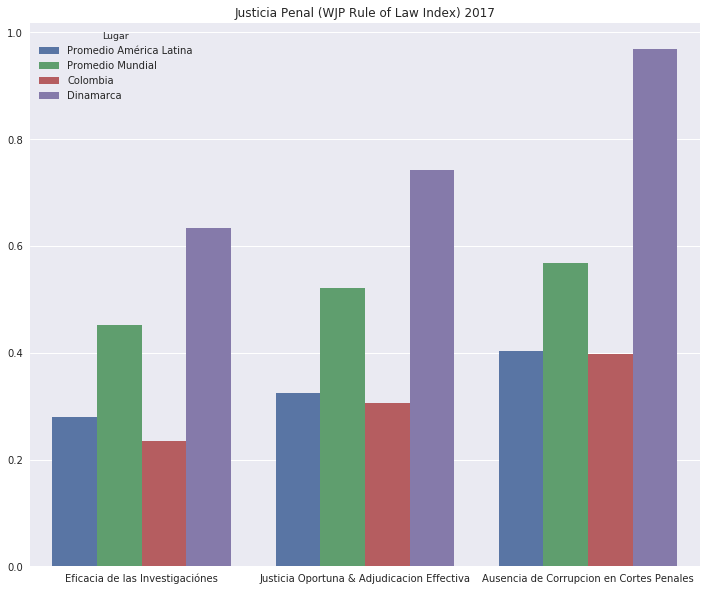

In [5]:
data = pandas.read_excel(
    'ROL.xlsx',
    sheet_name=[
        2, 3, 4
    ]
)

aml_co = [ 
    "Brazil", "Mexico", "Colombia", "Argentina", 
    "Peru", "Venezuela", "Chile", "Ecuador",  
    "Bolivia",  "El Salvador"
]

new_data = {}
for index, (key, df) in zip(range(2015, 2018), data.items()):
    new_df.loc[:, df.columns != 'Country'] =  1.0 - new_df.loc[:, df.columns != 'Country']
    new_data[index] = df


avg_data = {}
for key, df in new_data.items():
    avg_data[key] = pandas.DataFrame([
        {'Lugar': 'Promedio América Latina', 'Indice': 'Eficacia de las Investigaciónes' ,'Valor': df.loc[50, aml_co].mean()},
        {'Lugar': 'Promedio Mundial', 'Indice': 'Eficacia de las Investigaciónes' , 'Valor': df.loc[50, df.columns != 'Country'].mean().mean()},
        {'Lugar': 'Colombia', 'Indice': 'Eficacia de las Investigaciónes' , 'Valor': df.loc[50, "Colombia"]},
        {'Lugar': 'Dinamarca', 'Indice': 'Eficacia de las Investigaciónes' , 'Valor': df.loc[50, "Denmark"]},

        {'Lugar': 'Promedio América Latina', 'Indice': 'Justicia Oportuna & Adjudicacion Effectiva', 'Valor': df.loc[51, aml_co].mean()},
        {'Lugar': 'Promedio Mundial', 'Indice': 'Justicia Oportuna & Adjudicacion Effectiva',  'Valor': df.loc[51, df.columns != 'Country'].mean().mean()},
        {'Lugar': 'Colombia', 'Indice': 'Justicia Oportuna & Adjudicacion Effectiva',  'Valor': df.loc[51, "Colombia"]},
        {'Lugar': 'Dinamarca', 'Indice': 'Justicia Oportuna & Adjudicacion Effectiva',  'Valor': df.loc[51, "Denmark"]},
        
        {'Lugar': 'Promedio América Latina', 'Indice': 'Ausencia de Corrupcion en Cortes Penales', 'Valor': df.loc[54, aml_co].mean()},
        {'Lugar': 'Promedio Mundial', 'Indice': 'Ausencia de Corrupcion en Cortes Penales',  'Valor': df.loc[54, df.columns != 'Country'].mean().mean()},
        {'Lugar': 'Colombia', 'Indice': 'Ausencia de Corrupcion en Cortes Penales',  'Valor': df.loc[54, "Colombia"]},
        {'Lugar': 'Dinamarca', 'Indice': 'Ausencia de Corrupcion en Cortes Penales',  'Valor': df.loc[54, "Denmark"]}
    ])

df = avg_data[2017].reset_index()
fig, ax = plt.subplots(figsize=(12, 10))
plt.title('Justicia Penal (WJP Rule of Law Index) 2017')
_ = sns.barplot(ax=ax, x='Indice', y='Valor', hue='Lugar', data=df, ci=None)
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)

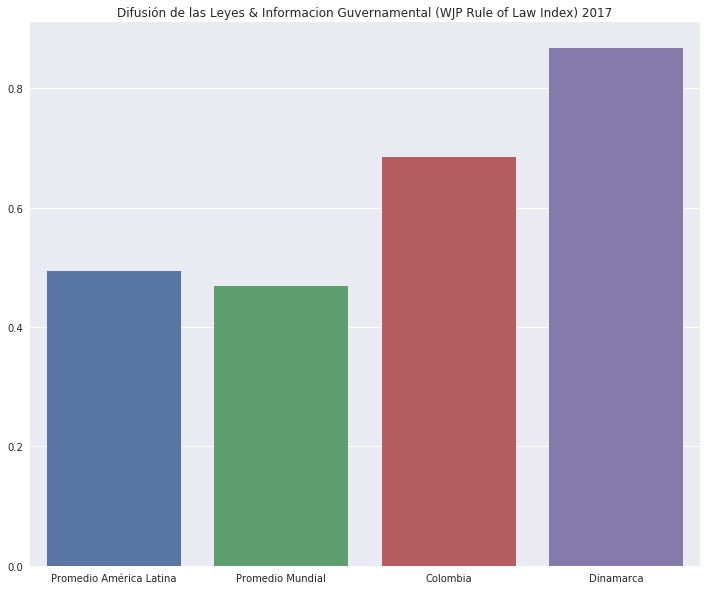

In [6]:
data = pandas.read_excel(
    'ROL.xlsx',
    sheet_name=[
        2, 3, 4
    ]
)

aml_co = [ 
    "Brazil", "Mexico", "Colombia", "Argentina", 
    "Peru", "Venezuela", "Chile", "Ecuador",  
    "Bolivia",  "El Salvador"
]

new_data = {}
for index, (key, df) in zip(range(2015, 2018), data.items()):
    new_df.loc[:, df.columns != 'Country'] =  1.0 - new_df.loc[:, df.columns != 'Country']
    new_data[index] = df


avg_data = {}
for key, df in new_data.items():
    avg_data[key] = pandas.DataFrame([
        {'Lugar': 'Promedio América Latina', 'Valor': df.loc[18, aml_co].mean()},
        {'Lugar': 'Promedio Mundial' , 'Valor': df.loc[18, df.columns != 'Country'].mean().mean()},
        {'Lugar': 'Colombia' , 'Valor': df.loc[18, "Colombia"]},
        {'Lugar': 'Dinamarca' , 'Valor': df.loc[18, "Denmark"]}
    ])

df = avg_data[2017].reset_index()
fig, ax = plt.subplots(figsize=(12, 10))
plt.title('Difusión de las Leyes & Informacion Guvernamental (WJP Rule of Law Index) 2017')
_ = sns.barplot(ax=ax, x='Lugar', y='Valor', data=df, ci=None)
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)

In [45]:
def get_cpi_df():
    df = pandas.read_csv("./Salarios.csv", encoding="ISO-8859-1")
    df.replace(0, numpy.nan, inplace=True)
    df.set_index("Year", inplace=True)
    
    df = df.interpolate()
    
    return df

#df = 
get_cpi_df()
#print(df.loc[1992, "Salario Congreso"] / df.loc[1992, "Salario Minimo"])
#print(df.loc[2017, "Salario Congreso"] / df.loc[2017, "Salario Minimo"])

,Inflacion,Salario Minimo,Salario Congreso,Tecnico,Tecnologo,Profesional Pregrado,Profesional Especialista,Profesional Magister,CEO,CFO,Futbolista
Year,,,,,,,,,,,
1991,26.82,51716,714665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,25.13,65190,2680000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993,22.60,81510,3400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,22.59,98700,4300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,19.46,118934,5213852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,21.63,142125,6334830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,17.68,172005,7898897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,16.70,203826,9290683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,9.23,236460,11046622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


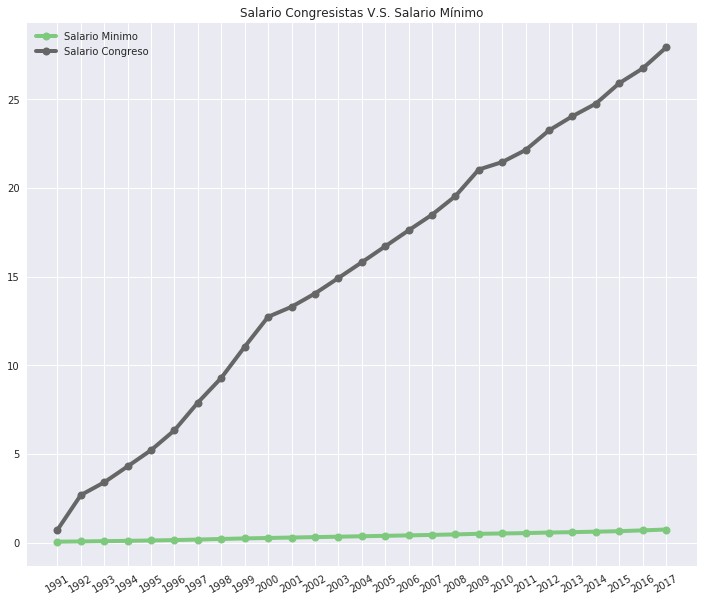

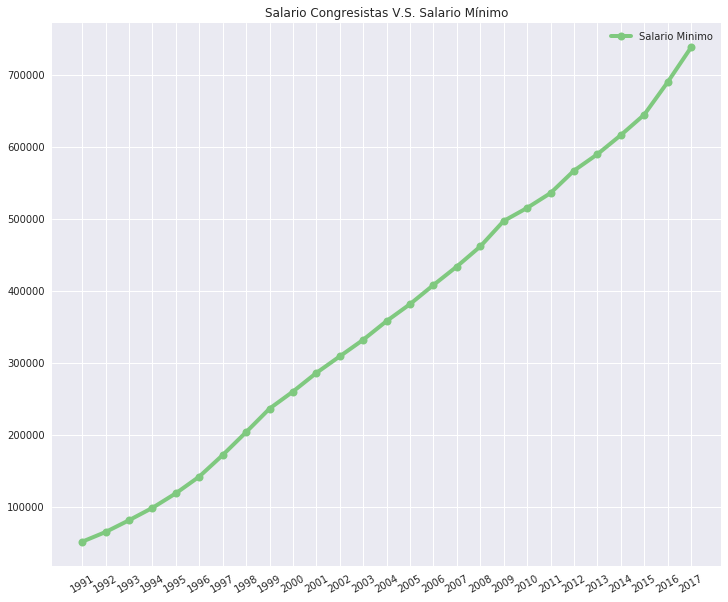

In [37]:
cvm = get_cpi_df()[["Salario Minimo", "Salario Congreso"]]

cvm =  cvm / 1000000

g = cvm.plot(label="Transición", 
         figsize=(12, 10), 
         linewidth=4, 
         style="-o",
         ms=8,
         colormap='Accent',
         title="Salario Congresistas V.S. Salario Mínimo",
         xticks=cvm.index.values)
_ = g.set_xticklabels(labels=cvm.index.values, rotation=30)
g.xaxis.label.set_visible(False)
g.yaxis.label.set_visible(False)


cvm = get_cpi_df()[["Salario Minimo"]]
g = cvm.plot(label="Transición", 
         figsize=(12, 10), 
         linewidth=4, 
         style="-o",
         ms=8,
         colormap='Accent',
         title="Salario Congresistas V.S. Salario Mínimo",
         xticks=cvm.index.values)
_ = g.set_xticklabels(labels=cvm.index.values, rotation=30)
g.xaxis.label.set_visible(False)
g.yaxis.label.set_visible(False)

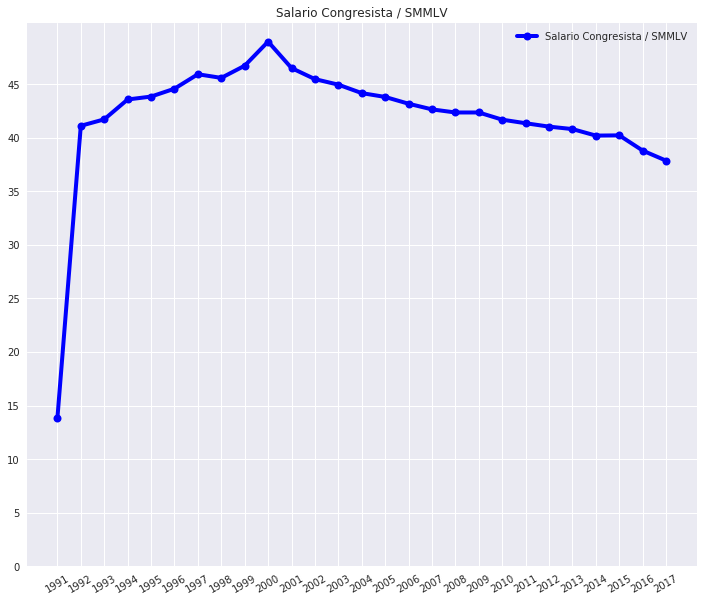

In [58]:
cvm = get_cpi_df()[["Salario Minimo", "Salario Congreso"]]

cvm["Salario Congresista / SMMLV"] = cvm["Salario Congreso"] / cvm["Salario Minimo"]
cvm = cvm[["Salario Congresista / SMMLV"]]
#Numero de Minimos que es el Salario de un Congresista

g = cvm.plot(label="Transición", 
             figsize=(12, 10), 
             linewidth=4, 
             style="-o",
             ms=8,
             colormap='bwr',
             title="Salario Congresista / SMMLV",
             xticks=cvm.index.values,
             yticks=range(0, 50, 5))
_ = g.set_xticklabels(labels=cvm.index.values, rotation=30)
g.xaxis.label.set_visible(False)
g.yaxis.label.set_visible(False)

In [9]:
def get_ipc_df():
    data = pandas.read_excel(
        'IPC.xlsx'
    )
    
    data = data[['Índice de precios al consumidor (IPC)', 'Unnamed: 1']]
    data.dropna(inplace=True)
    data.drop(7, inplace=True)
    
    data = data.rename(
        index=str, 
        columns={"Índice de precios al consumidor (IPC)": "Date", "Unnamed: 1": "IPC"}
    )
    
    data.set_index("Date", inplace=True)
        
    return data

df = get_ipc_df()
df.loc["1993-01", "IPC"]

17.958755

Variacion salario minimo 1992-2015: 119.59145063460495%
Variacion salario congreso 1992-2015: 116.99921308870414%
Diferencia variacion minimo VS congreso: 2.592237545900815%


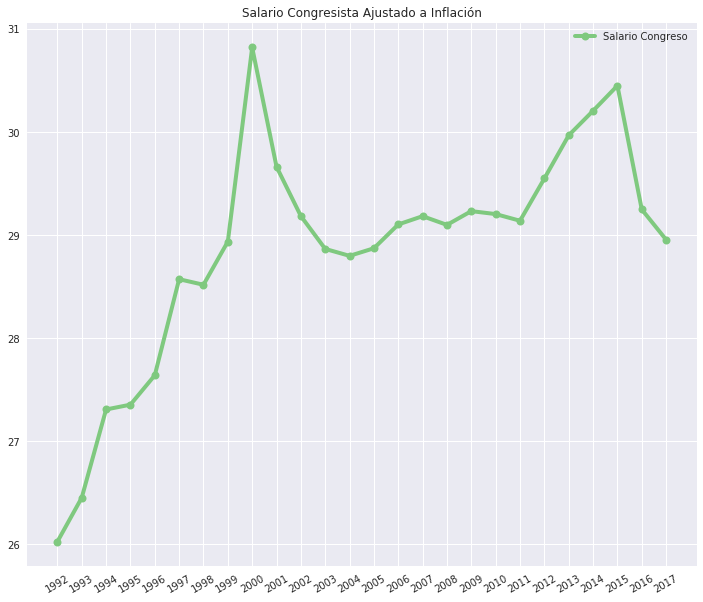

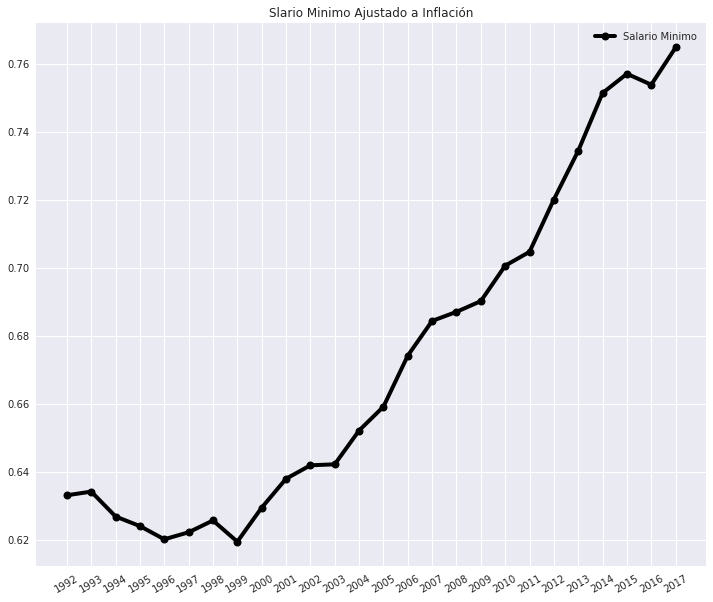

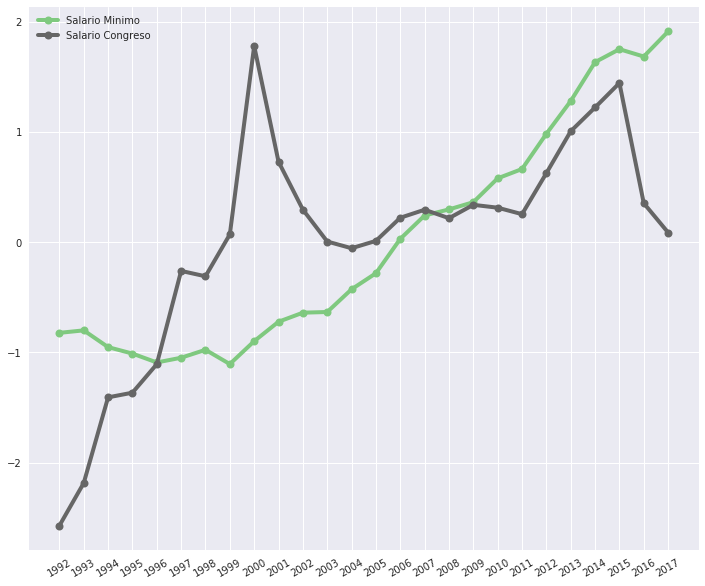

In [20]:
from sklearn.preprocessing import StandardScaler

ipc = get_ipc_df()
cvm = get_cpi_df()[["Salario Minimo", "Salario Congreso"]].loc[1992:]
cvm =  cvm / 1000000

cvm_adj = cvm

for index, data in cvm.iterrows():
    cvm_adj.loc[index, "Salario Congreso"] = (data["Salario Congreso"] / ipc.loc["{}-01".format(index), "IPC"]) * ipc.loc["2018-01", "IPC"]
    cvm_adj.loc[index, "Salario Minimo"] = (data["Salario Minimo"] / ipc.loc["{}-01".format(index), "IPC"]) * ipc.loc["2018-01", "IPC"]

cvm_adj_c = cvm_adj[["Salario Congreso"]]
g = cvm_adj_c.plot(label="Transición", 
                   figsize=(12, 10), 
                   linewidth=4, 
                   style="-o",
                   ms=8,
                   colormap='Accent',
                   title="Salario Congresista Ajustado a Inflación",
                   xticks=cvm.index.values)
_ = g.set_xticklabels(labels=cvm_adj_c.index.values, rotation=30)
g.xaxis.label.set_visible(False)
g.yaxis.label.set_visible(False)

cvm_adj_m = cvm_adj[["Salario Minimo"]]
g = cvm_adj_m.plot(label="Transición", 
                   figsize=(12, 10), 
                   linewidth=4, 
                   style="-o",
                   ms=8,
                   colormap='gray',
                   title="Slario Minimo Ajustado a Inflación",
                   xticks=cvm.index.values)
_ = g.set_xticklabels(labels=cvm_adj_c.index.values, rotation=30)
g.xaxis.label.set_visible(False)
g.yaxis.label.set_visible(False)

scaled_features = StandardScaler().fit_transform(cvm.values)
scaled_features = pandas.DataFrame(scaled_features)
scaled_features["Year"] = cvm.index.values
scaled_features = scaled_features.rename(
    index=str, 
    columns={1: "Salario Congreso", 0: "Salario Minimo"}
)

scaled_features.set_index("Year", inplace=True)
g = scaled_features.plot(label="Transición", 
                         figsize=(12, 10), 
                         linewidth=4, 
                         style="-o",
                         ms=8,
                         colormap='Accent',
                         xticks=cvm.index.values)
_ = g.set_xticklabels(labels=cvm.index.values, rotation=30)
g.xaxis.label.set_visible(False)
g.yaxis.label.set_visible(False)

#diff_minim = ((cvm_adj.loc[2015, "Salario Minimo"] / cvm_adj.loc[1992, "Salario Minimo"]) - 1) * 100
diff_minim = ((cvm_adj.loc[2015, "Salario Minimo"] * 100) / cvm_adj.loc[1992, "Salario Minimo"])
#diff_cong = ((cvm_adj.loc[2015, "Salario Congreso"] / cvm_adj.loc[1992, "Salario Congreso"]) - 1) * 100
diff_cong = ((cvm_adj.loc[2015, "Salario Congreso"] * 100) / cvm_adj.loc[1992, "Salario Congreso"])

print("Variacion salario minimo 1992-2015: {}%".format(diff_minim))
print("Variacion salario congreso 1992-2015: {}%".format(diff_cong))
print("Diferencia variacion minimo VS congreso: {}%".format(diff_minim - diff_cong))

Cuanto más aumento el minimo que el congreso: 0.2510420669027642%
Cuanto más aumento la inflacion que el minimo: -0.8894509338008234%
Cuanto más aumento la inflacion que el congreso: -0.6384088668980592%


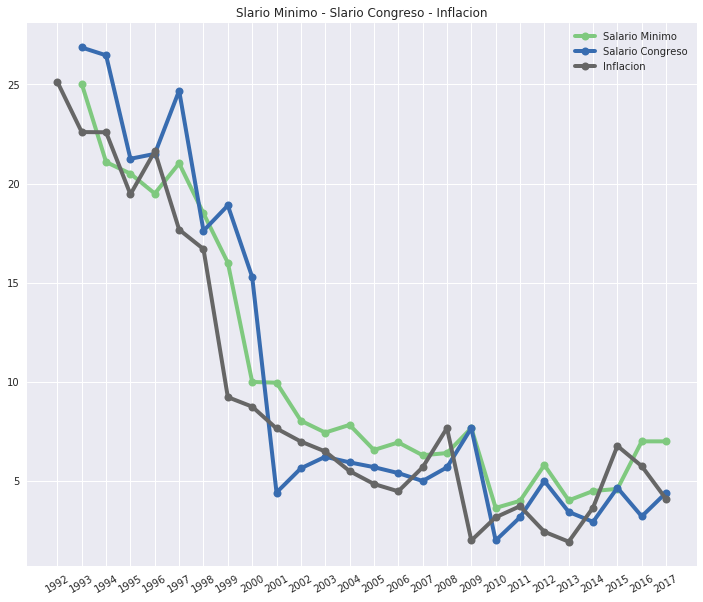

In [60]:
df = get_cpi_df()
cvm = get_cpi_df()[["Salario Minimo", "Salario Congreso", "Inflacion"]].loc[1992:]
cvm[["Salario Minimo", "Salario Congreso"]] = cvm[["Salario Minimo", "Salario Congreso"]].pct_change()
cvm[["Salario Minimo", "Salario Congreso"]] = cvm[["Salario Minimo", "Salario Congreso"]] * 100

g = cvm.plot(label="Transición", 
         figsize=(12, 10), 
         linewidth=4, 
         style="-o",
         ms=8,
         colormap='Accent',
         title="Slario Minimo - Slario Congreso - Inflacion",
         xticks=cvm.index.values)
_ = g.set_xticklabels(labels=cvm.index.values, rotation=30)
g.xaxis.label.set_visible(False)
g.yaxis.label.set_visible(False)

cvm_m = cvm.mean()
cvm_m
diff_min_con = (cvm_m["Salario Minimo"] - cvm_m["Salario Congreso"])
diff_inf_con = (cvm_m["Inflacion"] - cvm_m["Salario Congreso"])
diff_inf_min = (cvm_m["Inflacion"] - cvm_m["Salario Minimo"])

print("Cuanto más aumento el minimo que el congreso: {}%".format(diff_min_con))
print("Cuanto más aumento la inflacion que el minimo: {}%".format(diff_inf_min))
print("Cuanto más aumento la inflacion que el congreso: {}%".format(diff_inf_con))

In [12]:
df = get_cpi_df()
cvm = get_cpi_df()[["Salario Minimo", "Salario Congreso", "Inflacion"]]

diff_minim = ((cvm.loc[2015, "Salario Minimo"] * 100) / cvm.loc[1992, "Salario Minimo"])
diff_cong = ((cvm.loc[2015, "Salario Congreso"] * 100) / cvm.loc[1992, "Salario Congreso"])

print("Variacion salario minimo 1992-2015: {}%".format(diff_minim))
print("Variacion salario congreso 1992-2015: {}%".format(diff_cong))
print("Diferencia variacion minimo VS congreso: {}%".format(diff_minim - diff_cong))

Variacion salario minimo 1992-2015: 988.4184690903513%
Variacion salario congreso 1992-2015: 966.9937313432836%
Diferencia variacion minimo VS congreso: 21.424737747067752%


In [13]:
df = get_cpi_df()
cvm = get_cpi_df()[["Salario Minimo", "Salario Congreso", "Inflacion"]].loc[1992:]
cvm[["Salario Minimo", "Salario Congreso"]] = cvm[["Salario Minimo", "Salario Congreso"]].pct_change()
cvm[["Salario Minimo", "Salario Congreso"]] = cvm[["Salario Minimo", "Salario Congreso"]] * 100

cvm_m = cvm.mean()
diff_min_con = (cvm_m["Salario Minimo"] - cvm_m["Salario Congreso"])
diff_inf_con = (cvm_m["Inflacion"] - cvm_m["Salario Congreso"])
diff_inf_min = (cvm_m["Inflacion"] - cvm_m["Salario Minimo"])

print("Cuanto más aumento el minimo que el congreso: {}%".format(diff_min_con))
print("Cuanto más aumento la inflacion que el minimo: {}%".format(diff_inf_min))
print("Cuanto más aumento la inflacion que el congreso: {}%".format(diff_inf_con))
print('------------------------------------------------------------------------------------------')
print("Correlacion Salario Minimo e Inflacion: {}".format(cvm['Salario Minimo'].corr(cvm['Inflacion'])))
print("Correlacion Salario Congreso e Inflacion: {}".format(cvm['Salario Congreso'].corr(cvm['Inflacion'])))
print("Correlacion Salario Minimo y Salario Congreso: {}".format(cvm['Salario Minimo'].corr(cvm['Salario Congreso'])))

Cuanto más aumento el minimo que el congreso: 0.2510420669027642%
Cuanto más aumento la inflacion que el minimo: -0.8894509338008234%
Cuanto más aumento la inflacion que el congreso: -0.6384088668980592%
------------------------------------------------------------------------------------------
Correlacion Salario Minimo e Inflacion: 0.9517884798373984
Correlacion Salario Congreso e Inflacion: 0.9292355666457827
Correlacion Salario Minimo y Salario Congreso: 0.9688852954558358


In [79]:
def get_cong_latam_df():
    df = pandas.read_csv("./CongresosLatam.csv", encoding="ISO-8859-1")
    df.replace(0, numpy.nan, inplace=True)
    df.set_index("Country", inplace=True)
    
    df['Gasto Publico'] = df['Gasto Publico'] / 100
    df.loc['Colombia \n (25 SLMV)'] = [
        (781242 * 25) / 3000,
        282.463,
        0.29959
    ]
    
    return df

get_cong_latam_df()

,Salarios,PIB (Bill),Gasto Publico
Country,,,
Argentina,9466.00,545.476,0.26000
Bolivia,2600.00,75.872,0.21811
Brasil,12000.00,1796.000,0.36240
Chile,13977.00,247.028,0.22412
Colombia,9306.00,282.463,0.29959
Costa Rica,6878.00,57.436,0.27814
Ecuador,5009.00,98.614,NaN
El Salvador,4025.00,26.797,0.20951
Honduras,3800.00,21.517,0.22119


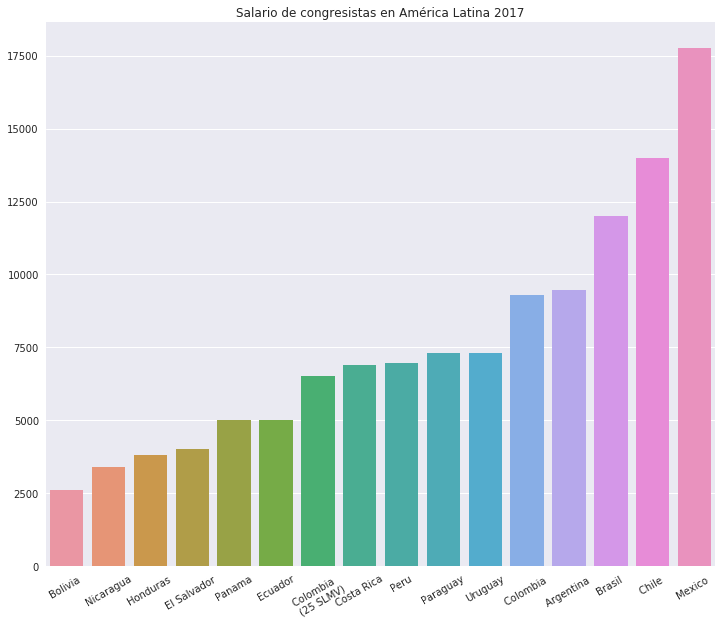

In [73]:
df = get_cong_latam_df().reset_index()
df = df.sort_values('Salarios')

fig, ax = plt.subplots(figsize=(12, 10))
plt.title('Salario de congresistas en América Latina 2017')
g = sns.barplot(ax=ax, x='Country', y='Salarios', data=df, ci=None)
_ = g.set_xticklabels(labels=df['Country'] , rotation=30)
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)

In [30]:
def get_senate_data():
    data = pandas.read_excel('Senado.xlsx')
    data = data.drop('1994-1998', axis=1)
    
    return data

get_senate_data()

,1998-2002,2002-2006,2006-2010,2010-2014,2014-2018,2018-2022
0,Acosta Bendek Gabriel,Albornóz Guerrero Carlos,Acosta Bendek Gabriel,Arbeláez Escalante Amparo,Acuña Díaz Laureano Augusto,Acuña Díaz Laureano Augusto
1,Acosta Medina Amilkar,Andrade Serrano Hernán Francisco,Aguirre Muñóz Germán Antonio,Aguilar Hurtado Nerthink Mauricio,Aguilar Hurtado Nerthink Mauricio,Agudelo García Ana Paola
2,Albornóz Guerrero Carlos,Angarita Baracaldo Alfonso,Andrade Serrano Hernán Francisco,Alonso López Héctor Julio,Álvarez Montenegro Javier Tato,Agudelo Zapata Iván Darío
3,Andrade José Aristides,Araújo Castro Alvaro,Araújo Castro Alvaro,Andrade Serrano Hernán Francisco,Amín Escaf Miguel,Aguilar Villa Richard Alfonso
4,Angarita Baracaldo Alfonso,Arenas Parra Luis Elmer,Arenas Parra Luis Elmer,Ashton Giraldo Alvaro Antonio,Amín Hernández Jaime Alejandro,Amín Escaf Miguel
5,Ardila Ballesteros Carlos,Artunduaga Sánchez Edgar,Arrieta Samuel Benjamín,Avellaneda Tarazona Luis Carlos,Andrade Casama Luis Evelis,Amín Salame Fabio Raúl
6,Arenas Parra Luis Elmer,Avellaneda Tarazona Luis Carlos,Ashton Giraldo Alvaro Antonio,Ballesteros Bermier Jorge Eliécer,Andrade Serrano Hernán Francisco,Andrade de Osso Esperanza
7,Barco López Víctor Renán,Barco López Víctor Renán,Avellaneda Tarazona Luis Carlos,Barreras Montealegre Roy,Araújo Rumié Fernando Nicolás,Araújo Rumié Fernando Nicolás
8,Betancourt Pulecio Ingrid,Benítez Maldonado Eduardo Augusto,Ballesteros Jorge,Barriga Peñaranda Carlos Emiro,Ashton Giraldo Alvaro Antonio,Avella Esquivel Aida Yolanda
9,Blel Saad Vicente,Bernal Amorocho Jesús Antonio,Barco López Víctor Renán,Benedetti Villaneda Armando,Avirama Avirama Marco Aníbal,Barguil Asis David Alejandro


In [33]:
df = get_senate_data()

periodos = []
for index_c in df.columns.values:
    for senador in df[index_c]:
        periodos.append({'senador': senador, 'periodos': 1, 'periodo': index_c})

df_s = pandas.DataFrame(periodos)
num_sen = len(df_s)
df_s = df_s.groupby('senador').sum().sort_values('periodos')
df_s = df_s.loc[df_s.periodos > 3]
num_rep = df_s.periodos.sum()
num_sen_rep = len(df_s)

print("Numero Total de curules desde 1998: {}".format(num_sen))
print("Numero senadores repitentes más de 3 periodos: {}".format(num_sen_rep))
print("Numero de Curules repitentes más de 3 Periodos: {}".format(num_rep))
print("Porcentaje de curules totales: {}".format((num_rep * 100) / num_sen))
df_s

Numero Total de curules desde 1998: 642
Numero senadores repitentes más de 3 periodos: 14
Numero de Curules repitentes más de 3 Periodos: 58
Porcentaje de curules totales: 9.034267912772586


,periodos
senador,
Sánchez Ortega Camilo,4
Cristo Bustos Juan Fernando,4
Cáceres Leal Javier Enrique,4
López Maya Alexander,4
Velasco Cháves Luis Fernando,4
Name Cardozo José David,4
Andrade Serrano Hernán Francisco,4
Córdoba Ruíz Piedad,4
Enríquez Maya Carlos Eduardo,4
